In [14]:
import numpy as np
import librosa
import os
from os import walk
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import datetime 
import pandas as pd

**Affichage des chromagramme et des moyennes de la PCP**


In [15]:
def get_chroma_vector(wav_file_path, target_duration=3):
    y, sr = librosa.load(wav_file_path, sr=None)

    chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
    df_chroma = pd.DataFrame(chroma)
    moyenne_par_colonne = df_chroma.mean()
    # Sélectionnez les colonnes dont la moyenne est inférieure ou égale à 0.6
    colonnes_a_conserver = moyenne_par_colonne[moyenne_par_colonne <= 0.65].index

    # Créez un nouveau DataFrame en ne conservant que les colonnes sélectionnées
    df_filtered = df_chroma[colonnes_a_conserver]
    new_chroma = df_filtered.to_numpy()
    return new_chroma

In [16]:
Guitar1 = r'C:\Users\mgere\VS_Code_Workspace\ESEO\PFE_Analayse_musicale\Chords_generation\chords_wav\G1_Cmaj_0.wav'
Guitar2 = r'C:\Users\mgere\VS_Code_Workspace\ESEO\PFE_Analayse_musicale\Chords_generation\chords_wav\G2_Cmaj_0.wav'

In [17]:
def get_feature(file_path):
 # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  chroma_mean = chroma.mean(axis=1)

  feature = chroma_mean
  return feature

**Creation du Dataset**

Récupération des données et labélisation

In [18]:
def extract_features(directory):
    features = []
    labels = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            feature = get_feature(file_path)
            label = file.split('_')[1].split('.')[0]
            features.append(feature)
            labels.append(label)

    return features, labels

In [19]:
dir = r'C:/Users/mgere/VS_Code_Workspace/ESEO/PFE_Analayse_musicale/Chords_generation/chords_wav'
features, labels = extract_features(dir)

Mélange aléatoire des données et encodage des labels

In [20]:
permutations = np.random.permutation(len(features))

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

features = np.array(features)[permutations]
labels_encoded = np.array(labels_encoded)[permutations]

**Phase d'apprentissage : SVM**

In [21]:
# Importations
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [22]:
# Séparation des données : entrainement / test
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVM Linéaire :

** **

In [23]:
# Entraînement du modèle SVM linéaire
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm_model.predict(X_test_scaled)

In [24]:
print("Number of unique classes in y_test:", len(np.unique(y_test)))
print("Number of unique classes in y_pred:", len(np.unique(y_pred)))

print("Number of classes in label_encoder:", len(label_encoder.classes_))

Number of unique classes in y_test: 10
Number of unique classes in y_pred: 10
Number of classes in label_encoder: 10


In [25]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


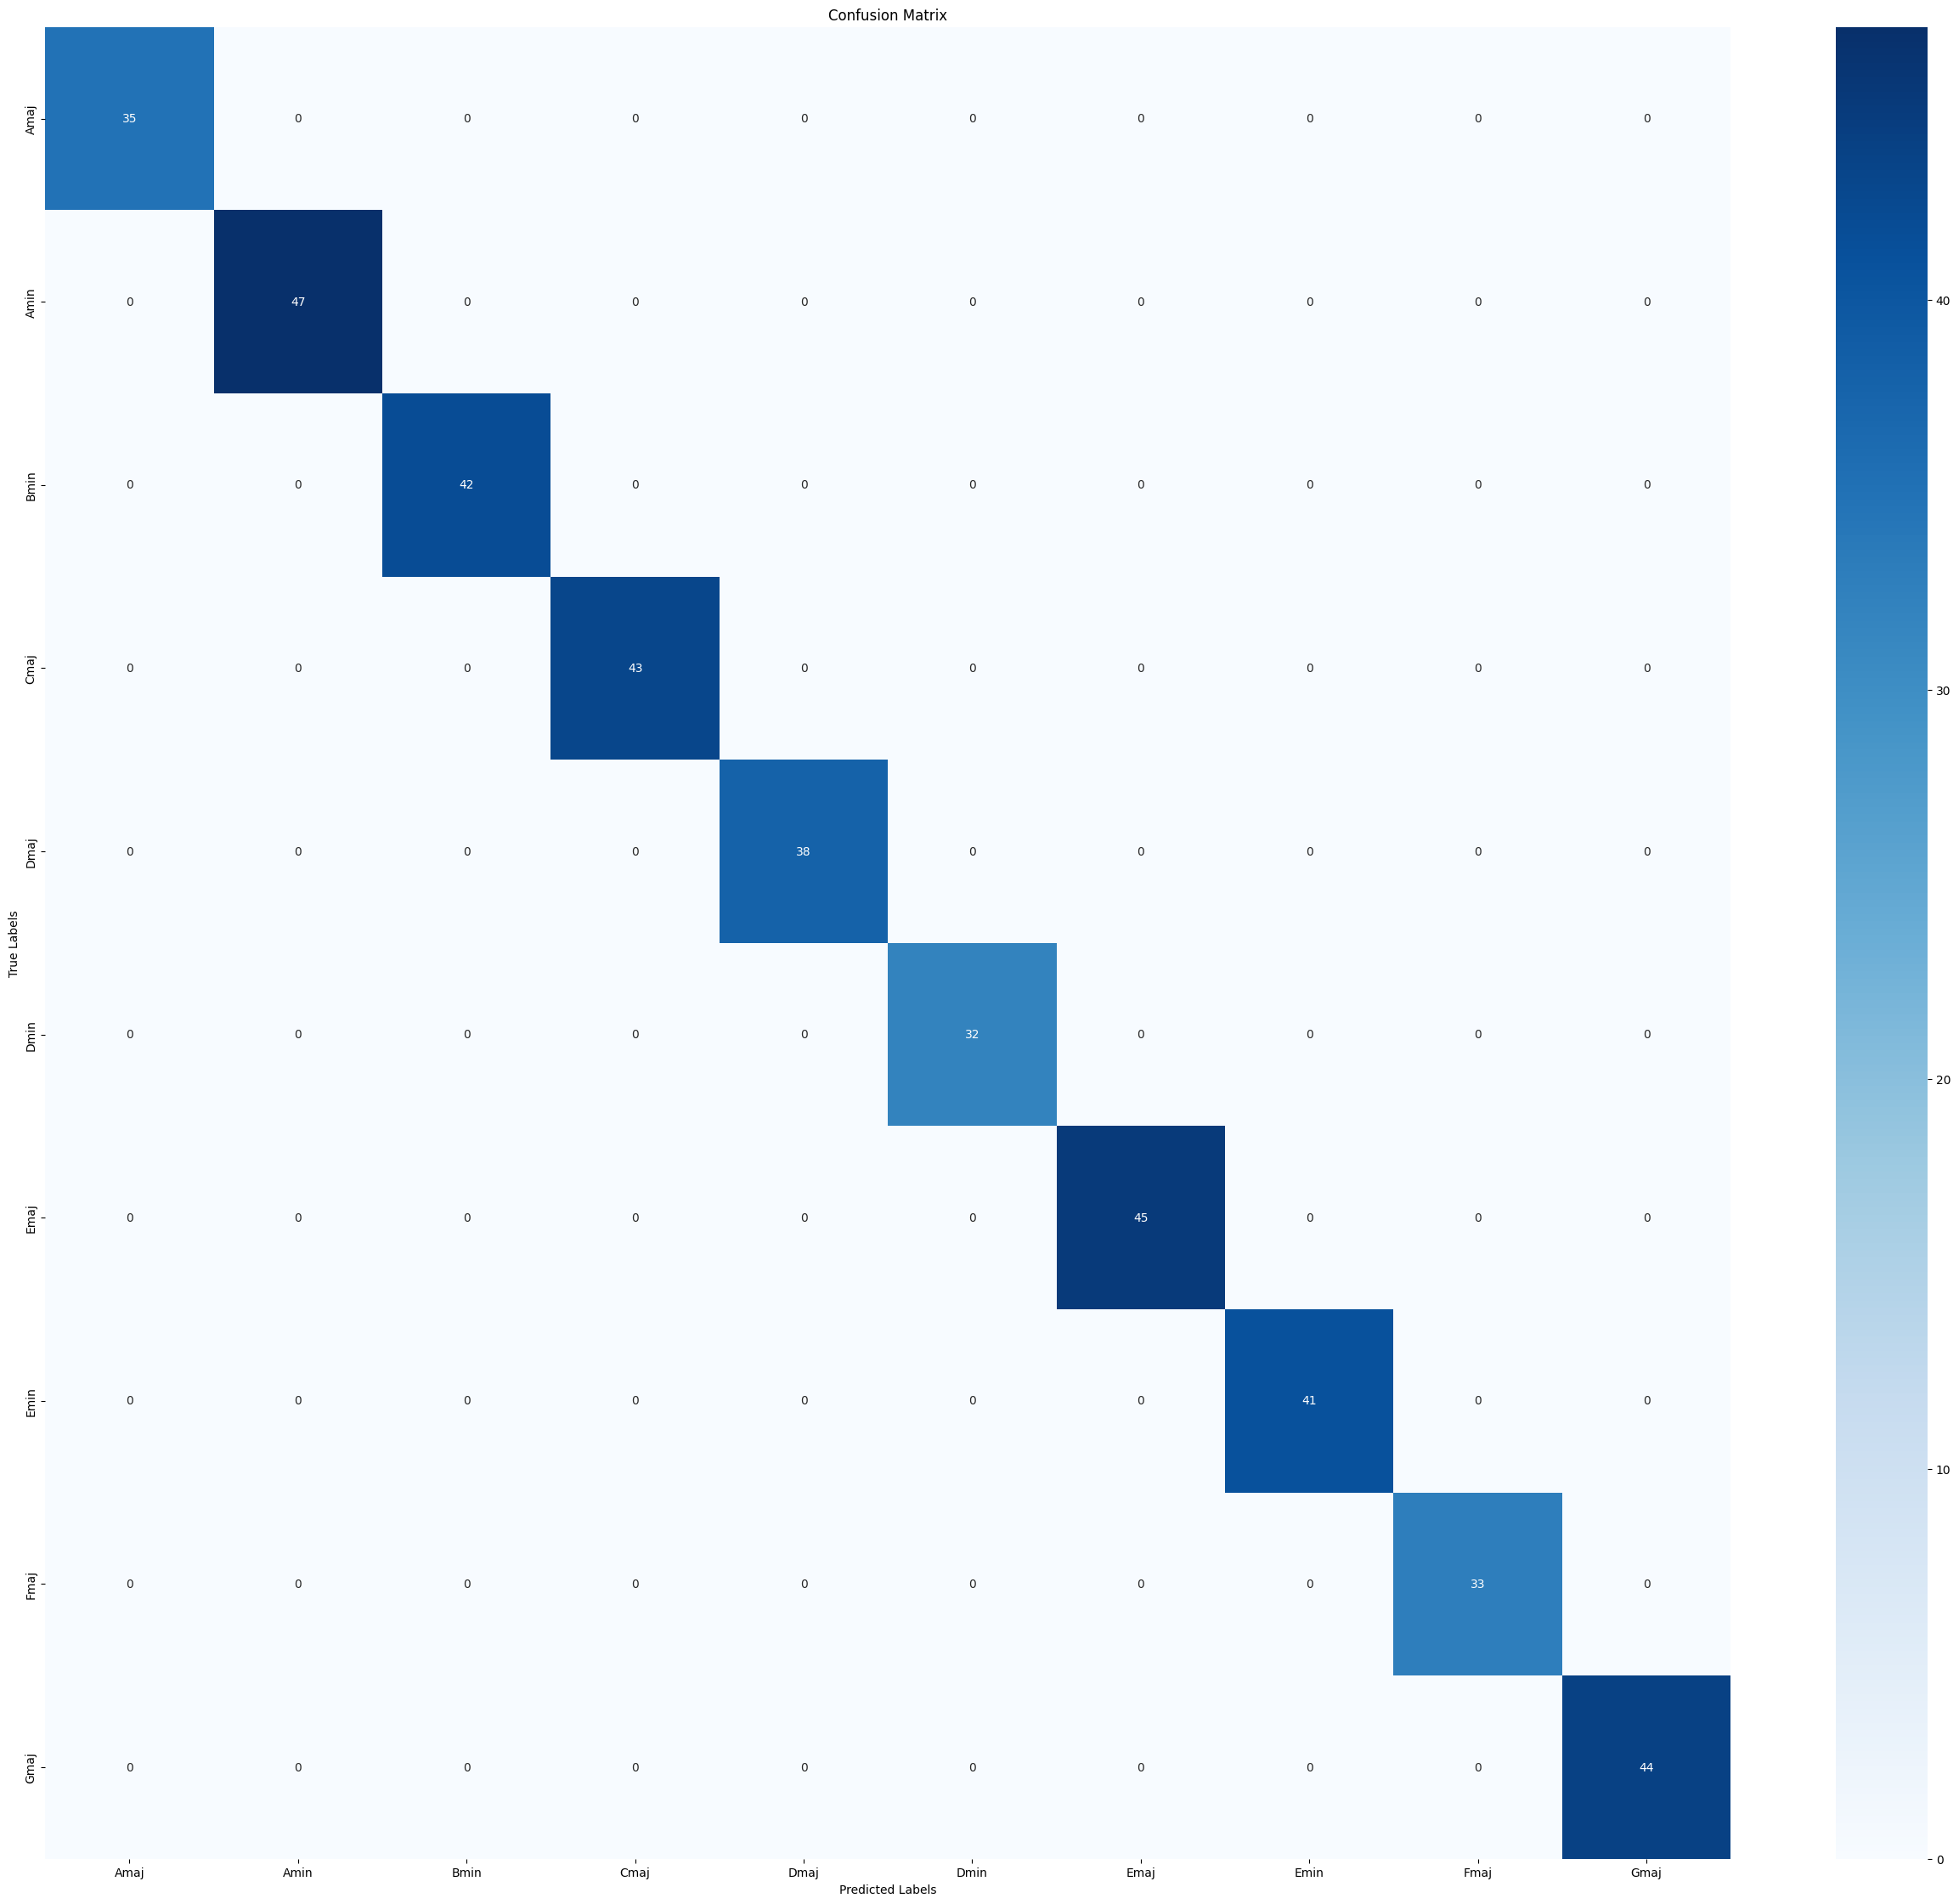

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(32, 28))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

SVM avec noyau RBF (Radial Basis Function) :

** **

In [27]:
# Entraînement du modèle SVM linéaire
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm_model.predict(X_test_scaled)

In [28]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


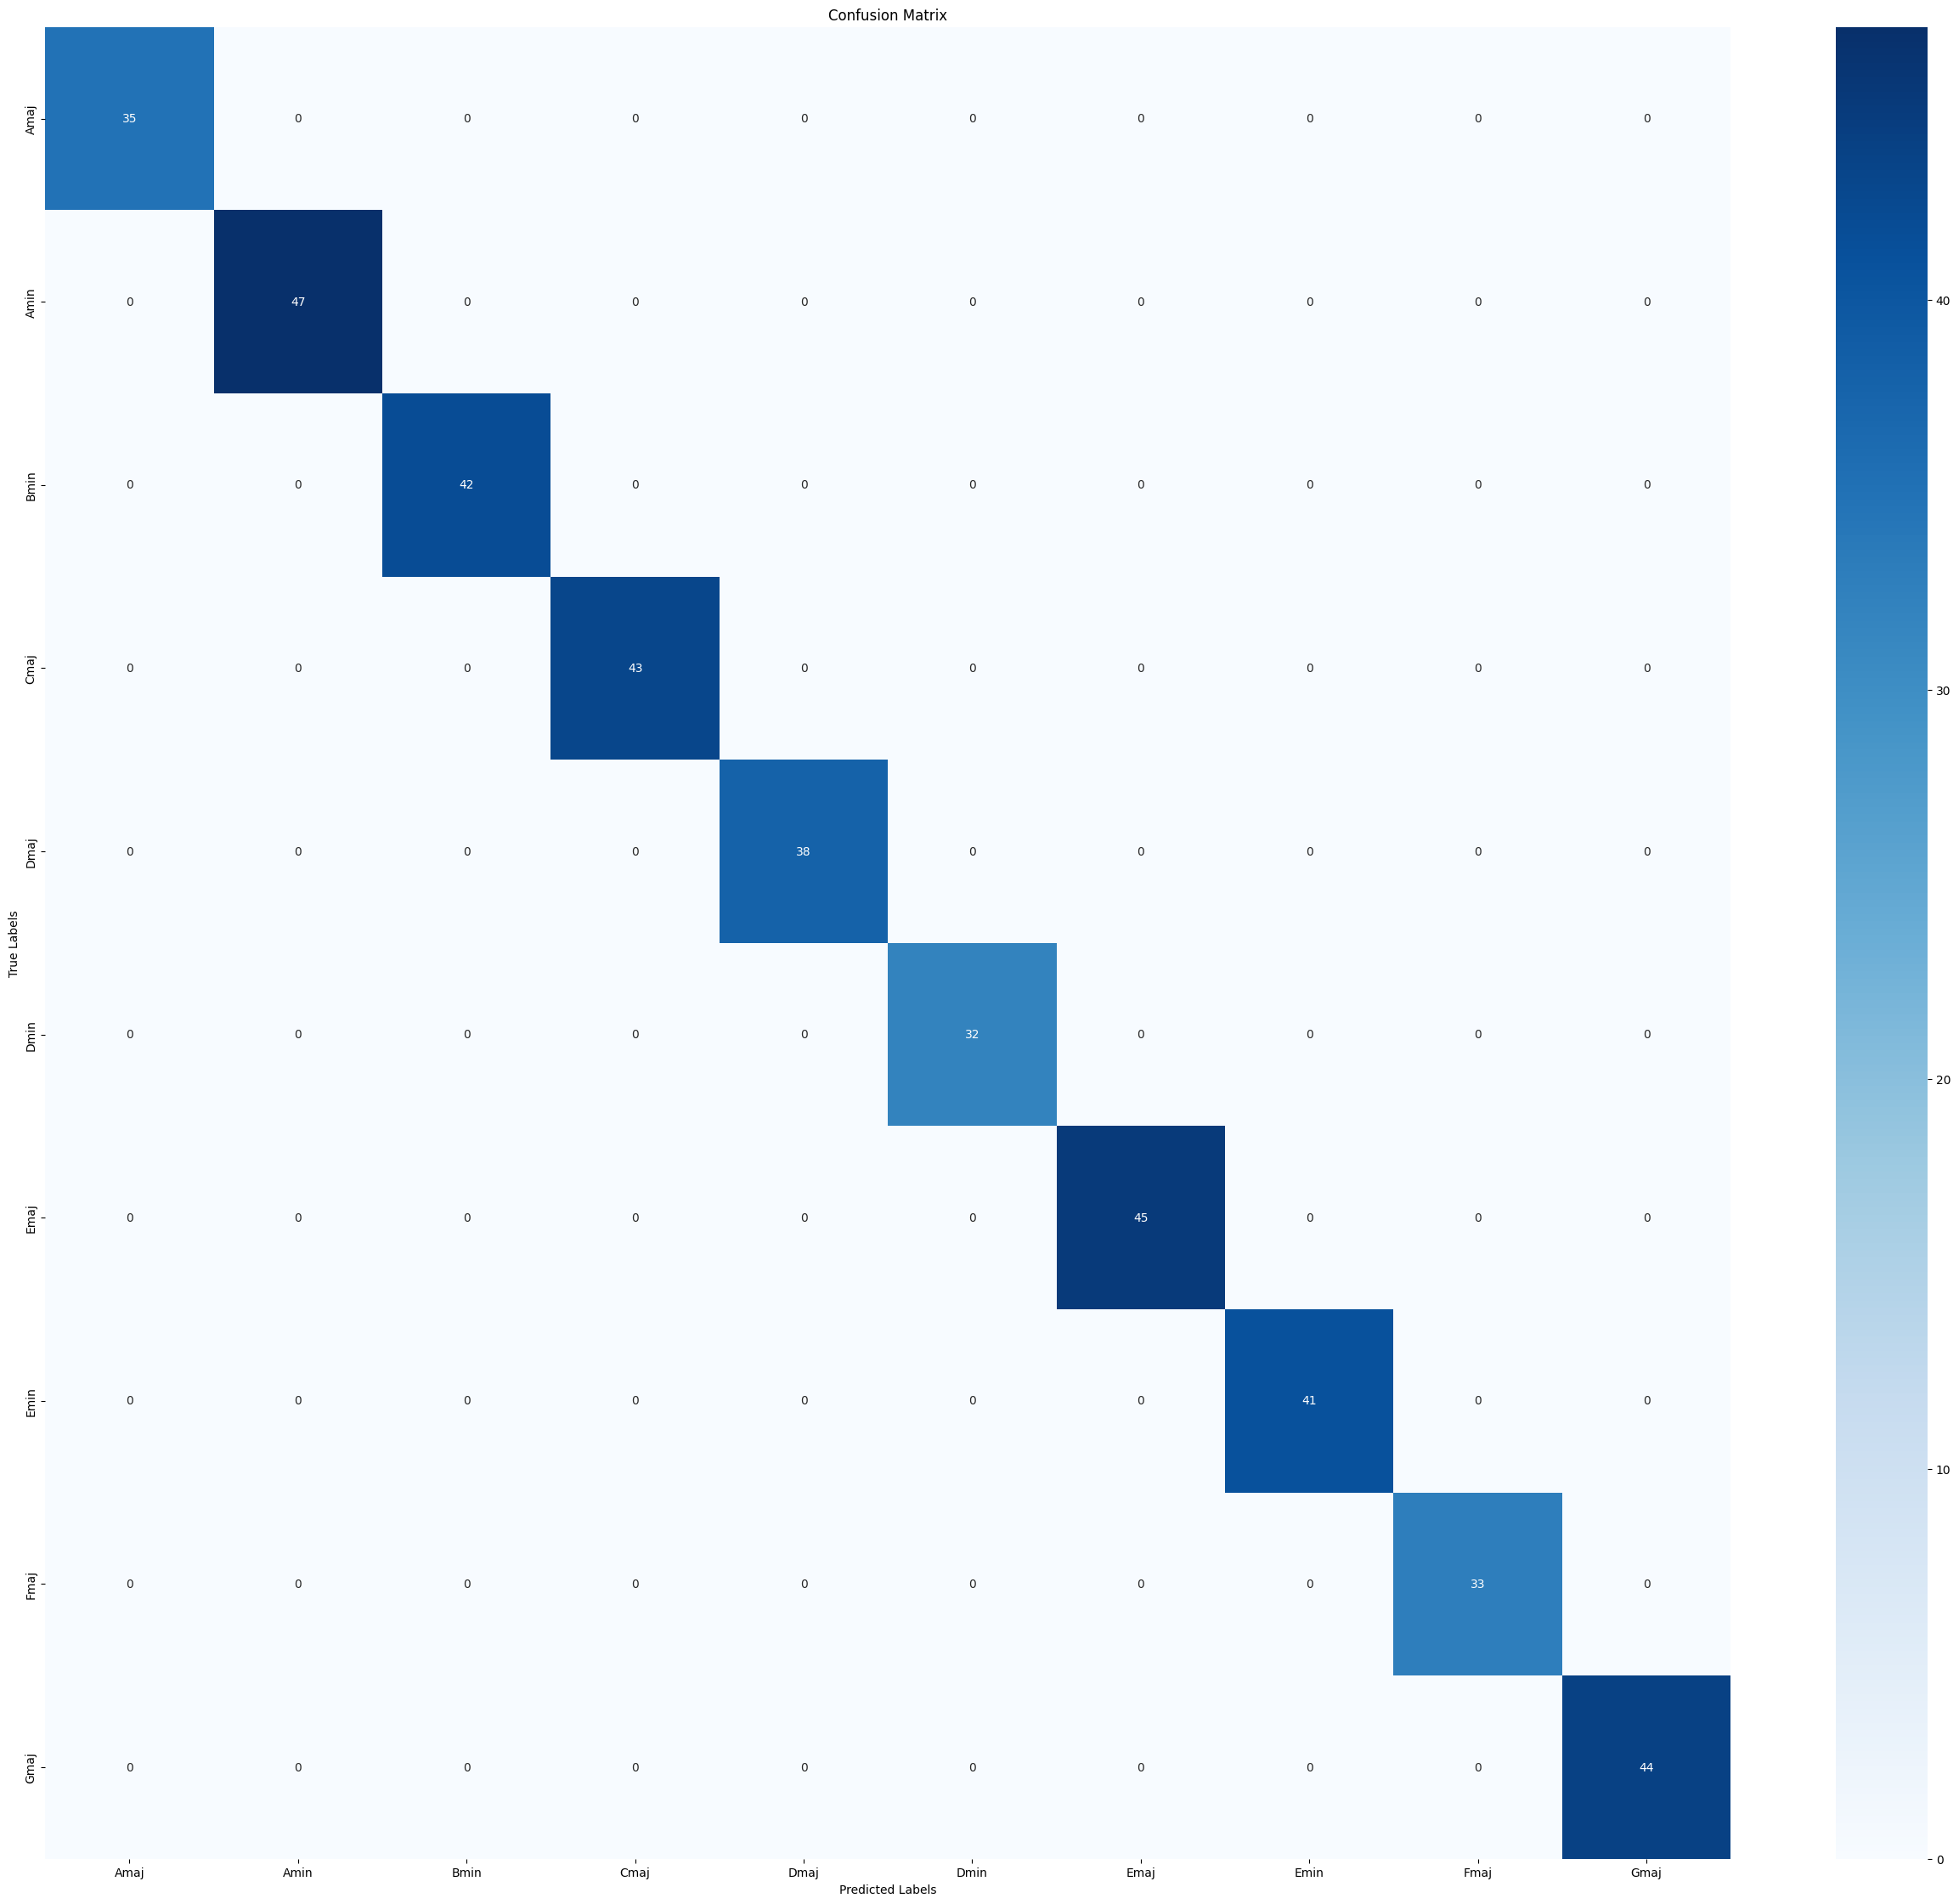

In [29]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(32, 28))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()